# Computing Project: Applied Mathematics Team 20

## Introduction

This project provides a comprehensive insight into the process of interpolation from different angles. It is important to understand this method to such an extent as it is one of the most simple and most efficient ways in which we can estimate values between known data points and therefore has wide reaching applications in the field of applied mathematics. 

We initially produce a function that provides the underlying infrastructure to perform piecewise Lagrange polynomial interpolation. We then build on our understanding of this tool by investigating one of the factors that impacts the convergence of the interpolation, namely the spacing between knots. 

To help with the visualization of the entire process, an interactive plot is created that shows how the degree of an interpolating polynomial can impact to what extent the interpolant is able to represent the relationship of the given knots. 

Finally, bringing all of the work together, Part 4 demonstrates the importance of interpolation in real life applications by using an example in which data has gone missing and showing how the tools developed in the previous three parts can provide a highly satisfactory solution for these types of issues. 


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact,interactive #Used in Question 3
from ipywidgets import fixed
import scipy # Used in Question 4
from scipy.interpolate import CubicSpline

# Part 1: Piecewise Lagrange Polynomial Interpolation 

This code aims to create a function that performs a piecewise Lagrange 
polynomial interpolation
For this purpose, we create a function that uses a piecewise polynomial interpolation method to approximate a function $f$, and we use unevenly spaced data points $(x_1, y_1)$.
 
 
In the PiecewisePoly function, a set of `N_interpolant` points is selected from the given data points `x0` and `y0` to construct a polynomial of degree `Ndeg`. The vander function is used to obtain the Vandermonde matrix of the selected `Ndeg+1` points, and then the coefficients of the polynomial are obtained using `linalg.solve`. The pts variable is used to select the `Ndeg+1` points at which the polynomial has to be evaluated.
 
 
Afterward, for each evaluation point in `x_j`, the function investigates the interval in which it falls in the `x0` array and selects the corresponding polynomial to use for interpolation. The variable `j` is used to select the correct polynomial and ensure that the selected points for that polynomial are within the range of the original data points. Finally, the interpolation polynomial is evaluated at the given point using the coefficients and the corresponding powers of `x_j[n]`.
 
 
The code generates data using the $f$ function and uses the PiecewisePoly function to interpolate it at the evaluation points `x2`. The resulting interpolated polynomial is plotted with the original data and the actual function for comparison.


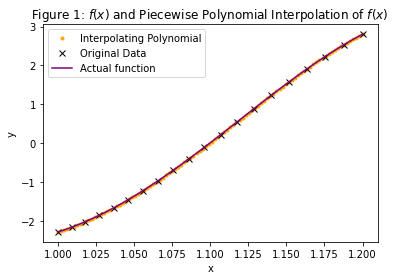

In [2]:
def PiecewisePoly(Ndeg, x0, y0, x_j):                      
    MM = Ndeg + 1                                         
    N_interpolant = len(x0) - Ndeg                         
    pts = np.arange(Ndeg+1) + np.arange(N_interpolant).reshape(N_interpolant,1)
    
    a = np.zeros((Ndeg+1,N_interpolant))
    pows = (MM-1-np.arange(MM)).reshape(MM,1)         
    
    for i in range(N_interpolant):
        A = np.vander(x0[pts[i,:]])
        a[:,i] = np.linalg.solve(A,y0[pts[i,:]])
    
    y = np.empty_like(x_j)  # `x_j` is the array of x-values at which to evaluate the interpolated function
    pows = Ndeg-np.arange(MM)                     #putting powers in correct order
    
    for n in range(len(x_j)):
        if((x_j[n]<x0).all()):
            k=0
        elif((x_j[n]>x0).all()):
            k=len(x0)-1
        else:             # find k for x_i, accounting for the possibility that x_i=x_k
            k = np.where(((x_j[n]<x0[1:]) & (x_j[n]>=x0[:-1])) | 
                         ((x0[1:]==x_j[n]) & (x_j[n]>x0[:-1])))[0][0]
     
        j = k - Ndeg//2    
        j = max(0,j)
        j = min(j,N_interpolant-1)
        
        y[n] = np.sum(a[:,j]*x_j[n]**pows)  # obtain new data point
        
    return y

# Testing our function with a given function and uneven data points. 

def f(x):
    return np.exp(x)*np.cos(10*x)

N = 20
r0 = np.linspace(0,1/6,N)

x1 = 1/(1-r0) # coordinate transformation to test uneven spacing
y1 = f(x1)

# Evaluation points
x2 = np.linspace(x1[0],x1[-1],100) #changed start and ending points to be within the range of x1 to avoid extrapolation
Y = PiecewisePoly(10, x1, y1, x2)

# Plotting our Piecewise polynomial and comparing it to the actual function

plt.plot(x2, Y, ".", color = "orange",label="Interpolating Polynomial")
plt.plot(x1, y1, "x", color = "black",label="Original Data")
plt.plot(x2, f(x2), color = "purple",label="Actual function")    
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure 1: $f(x)$ and Piecewise Polynomial Interpolation of $f(x)$ ")
plt.legend()
plt.show()

# Part 2: Error Convergence for Piecewise Polynomial

The goal of this code is to investigate the convergence of the interpolation we did in the previous question by using evenly spaced data and varying the number of points $N$, or spacing $h$, to obtain a plot of error-vs-h where $h =\frac{b-a}{N-1}$ is the usual knot spacing.

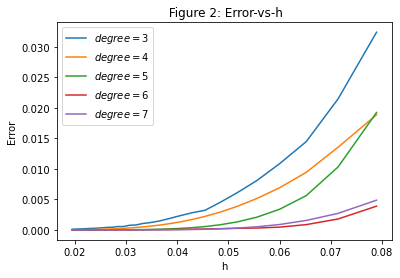

In [3]:
# Creating a funciton to return the maximum error 
def error_function(N, f, a, b, deg):
    
    x1 = np.linspace(a, b, N)
    y1 = f(x1)
 
    evalpts = np.linspace(a, b, 100)
    
    # deleting points in evalpts if they are equal to x1
    for i in range(len(x1)):
        if (evalpts[i] == x1[i]):
            np.delete(evalpts, i)

    Y = PiecewisePoly(deg, x1, y1, evalpts)
    
    max_error = max(abs(f(evalpts) - Y))
    
    return max_error

# Function to plot the error considering degree of the piecewise poly
def PlotError(deg):
    X = []
    Y = [] 
    for N in range(20, 80, 2):
    
        a = 0
        b = 1.5   
    
        h = (b-a)/(N-1)
    
        X.append(h)
        Y.append(error_function(N, f, a, b, deg))
    
    plt.plot(X, Y,label=f'$degree={deg}$')
    plt.xlabel("h")
    plt.ylabel("Error")
    plt.title(" Figure 2: Error-vs-h")

# Plotting degrees 3 to 7
for i in range(3, 8):
    PlotError(i)
    plt.legend()

For this purpose, we define `error_function` and `PlotError` and use them to plot the error of a piecewise polynomial approximation for a given function $f$ over the interval $[a, b]$.
 
The first function, `error_function` takes as input the number of sample points `N`, the function `f`, the interval endpoints a and `b`, and the degree of the piecewise polynomial approximation deg.
 
Afterward, this function computes the maximum error between f and the piecewise polynomial approximation over 100 equally spaced evaluation points in $[a, b]$. To compute the approximation, it first generates $N$ equally spaced sample points, computes the function values at these points, and then generates the evaluation points. Then, it removes any evaluation points that coincide with the sample point `x1` to avoid potential numerical errors and computes the piecewise polynomial approximation using the `PiecewisePoly` function. Finally, it computes the maximum absolute difference between `f` and the approximation over the evaluation points.
 
 
The second function, `PlotError` takes the degree of the piecewise polynomial approximation deg as input and generates a plot of the error vs. step size $h$, where $h$ is computed as the interval length $b-a$ divided by $N-1$. This step is done by computing the error using `error_function` for various values of N between 20 and 80 with step size 2, and plotting the results.

In the second step, we define a function `Conv` that computes the convergence rate of the error in piecewise polynomial interpolation when step size $h$ decreases.

We initialize three empty lists: `X`, `X_new`, and `Y`.
-   	 `X` stores the step sizes used in the interpolation
-  	`X_new` stores the transformed step sizes (scaled by $10^{n-1}$ and raised to the nth power)
- 	`Y` stores the errors computed using error_function.
 
Then we loop over a range of values for N, compute the corresponding step size h, and append it to X. We calculate using the transformed step size, appending it to `X_new` and calculate the error using `error_function`, appending it to Y. The function returns `X`, `Y`, and `X_new`.
 
We plot the results obtained in different subplots and for each subplot, the code computes the convergence rate of the error in piecewise polynomial interpolation for a given degree of polynomial interpolation (degree). The plots help visualize how the error decreases as the step size decreases and how the convergence rate changes according to the degree of polynomial interpolation.



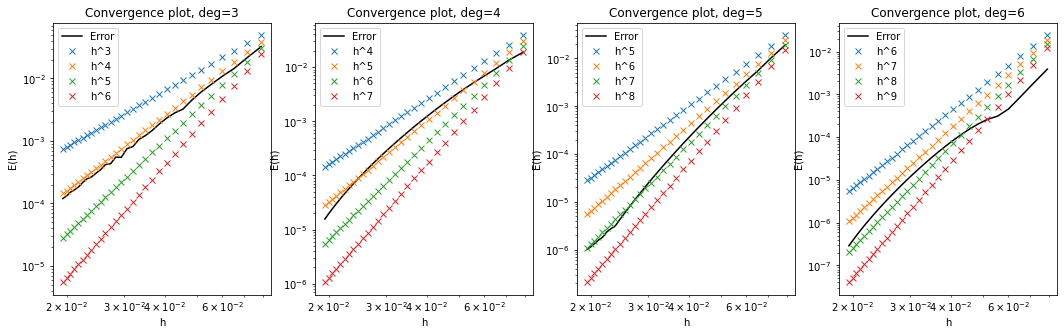

In [4]:
# Function to test rate of convergence of error data
def Conv(deg, n):
    
    X = [] 
    X_new = [] 
    Y = [] 
    
    for N in range(20, 80, 2):
        a = 0
        b = 1.5  
        h = (b-a)/(N-1)
    
        X.append(h)                     
        X_new.append(10**(n-1)*h**n)    # storing new step-size proportianate to h^n
       
        Y.append(error_function(N, f, a, b, deg))
        
    return X,Y,X_new

# Creating subplots to show the convergence rate for 4 degrees
fig, axs = plt.subplots(1,4, figsize=(18, 5))
for j in range(4):
    degree = j+3
    axs[j].loglog(Conv(degree,0)[0],Conv(degree,0)[1],'-',label="Error",color='k')
    
    for n in range(degree,degree+4):       # comparing h^n for 4 different n 
        
        axs[j].loglog(Conv(degree,n)[0],Conv(degree,n)[2],'x',label=f'h^{n}') 
        axs[j].set_xlabel("h")
        axs[j].set_ylabel("E(h)")
        axs[j].set_title("Convergence plot, " f'deg={degree}')
        axs[j].legend()

In Figure 2, we can see that the degree 5 error doesn’t follow the expected trend, however, the error still increases following $h$, but just not at the same rate as all other degrees. This could be due to the way the intervals are divided for the tested function $f(x)$, as the inconsistency did not occur when we compare the error against $h$ for other functions.

In Figure 3, there are 4 subplots showing the convergence plots for 4 different degrees of piecewise polynomial interpolation and which relate the error function to $h^n$ (varying the number of data points), for some $n$. This is plotted as a log-log graph and we will compare the error alongside $h^n$, where $n$ ranges between the degree and the degree + 3. For each degree, the plot shows the error as a solid black line, and several coloured points, indicating the error obtained for different values of $h^n$. We have scaled the value of $h^n$ by $10^{n-1}$ to provide a better visual representation of the error function compared to $h^n$ and an easier way to anticipate the expected trend. The gradient of the line will stay the same, all this does is shifts the line up or down, making it closer to the actual error function which makes the graph easier to read.

From the graphs, we can see that all degrees follow a similar trend where the gradient of the error predominantly follows the same shape as the orange or the green lines, respectively, these lines are $h^{deg+1}$ and $h^{deg+2}$. The first 2 subplots suggest that degrees 3 and 4 are of order of the orange line and the second 2, degrees 5 and 6, are of order of $h^{deg+2}$. Although a lack of accuracy, we can predict that the rate of convergence from the error data is proportional to $h^n$, where $n$ is either $(deg + 1)$ or $(deg+2)$. As above this imprecision could be due to the tested function.



# Part 3: Visualisation of Lagrange Polynomial Interpolation

In this part we aim to visualize the process of Lagrange polynomial interpolation by creating an interactive tool aiding in the understanding of how increasing the degree contributes to the closer fitting of the desired points.

In [14]:
#Defining the function and knots
f = lambda X: np.e**X*np.cos(10*X)

M = 11
x0 = np.linspace(1,2,M)      #  1D array containing the x-coordinates for the knots  
y0 = f(x0)                   #  1D array containing the y-coordinates for the knots

N = 101
x = np.linspace(1,2,N)    #  1D array generating x values in the interval of the function f

# Returns: Correct interpolation points depending on the number of knots desired (d)
def get_points(x0, d):
    startIndex = (len(x0)-d)//2 
    return x0[startIndex:startIndex+d]

# Returns the desired polynomial
def make_poly(x,x0,d):
    xorder = get_points(x0, d) # obtains the points at which we perform interpolation
    yorder = f(xorder)
    
    A = np.vander(xorder)                  # construct the Vandermode matrix
    coeff = np.linalg.solve(A,yorder)      # the first term is the coefficient of the highest order

    J = len(xorder)
    
    pows = (J-1-np.arange(J)).reshape(J,1)             # these are the exponents required
    xnew = np.reshape(x,(1,N))                         # reshape for the broadcast
    y = np.sum((xnew**pows)*coeff.reshape(J,1),axis=0)
    
    return y

# Plots all elements together
def plot_poly(x0,y0,x,degree):              
    # x0, y0 are the knots; x is the continuous domain; degree is the degree of the polynomial
    plt.plot(x0,f(x0),label = 'data')   # plotting f(x0)
    plt.plot(x,make_poly(x,x0,degree+1),label = 'poly interpolated data')  # plotting the langrange interpolation
    plt.plot(get_points(x0,degree+1),f(get_points(x0,degree+1)),'bo')      # plotting the knots
    plt.ylim(-10, 10)
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Figure 4:Polynomial Interpolation with Varying Degree")
    
    return

There are a number of tools and methods covered in the course that contribute to producing the final interactive plot. This includes interactive plotting, broadcasting and of course Lagrange polynomial interpolation. 

The code is structured through three logical functions that build up on one another: `get_points`, `make_poly`, and `plot_poly`.
`plot_poly` allows us to integrate all visual elements needed to make the interactive plot as helpful as possible; `make_poly` performs the Lagrange interpolation; and `get_points` decides at which points the interpolation is performed.

`get_points(x0, degree)`
One of the primary logical challenges of this task was to find a way in which we could choose points to interpolate with from the centre out. The simplest solution seemed to be to take the total number of points, subtract the degrees we desire and then divide the resulting number by two. This then gave the “framing” number of points on either side of the desired points. Therefore we could slice `x0` using the calculated value as the starting index and the value plus the number of knots as the final index.

`make_poly(x, x0, degree)`
This function returns the y values of the Lagrange interpolant evaluated at points `x`. This is done by the standard procedure. Initially we determine the knots we want to evaluate at using the `get_points` function and then find the corresponding y values. Using the vander function of the numpy package we are then able to determine the desired coefficients and finally, by applying array broadcasting, we can obtain the desired y values.

`plot_poly(x0, y0, x, degree)`
This function contains all the infrastructure for generating the plots of the data and Lagrange polynomials.

Finally, `plot_poly` is used in the “interactive” function of the ipywidgets package, keeping `x0`, `y0` and `x` fixed and varying only the degree, producing the following plot.


In [15]:
interactive(plot_poly, x0 = fixed(x0), y0 = fixed(y0),x = fixed(x), degree = (1, M-1))

interactive(children=(IntSlider(value=5, description='degree', max=10, min=1), Output()), _dom_classes=('widge…


The plot shows an approximation of the data provided using a Lagrange interpolating polynomial. The knots used in the interpolation are highlighted from the rest of the data. The interactive bar allows the reader to change the degree of the polynomial from a linear polynomial to a polynomial of degree 10. The interactive plot shows that as the degree of the polynomial increases, the approximation gets closer to the data curve.


# Part 4: Using  Piecewise Polynomial and Cubic Spline Interpolation on a Larger Data Set

In part 4, we are analysing a data set from a water tank measuring water elevation against time. This data is used as knots for both piecewise cubic polynomial, and cubic spline interpolation.

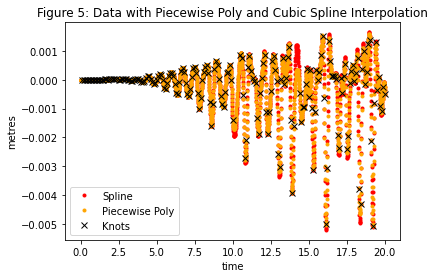

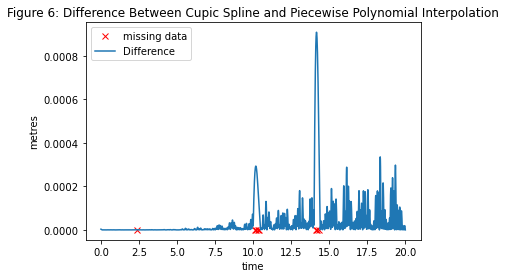

In [12]:

#Loading Data:
data1 = np.loadtxt('wave_data1.txt')
data1.shape
t = data1[0] #time
xi = data1[1] #elevation

#Finding Missing Times:
missing_times = np.array([])

for i in range(1,len(t)):
    if t[i] == 20: #need the index of time = 20s for later in the question
        t20 = i
    diff = round(t[i] - t[i-1], 1)
    if diff > 0.1:
        nt = t[i-1]
        for j in range(1,int(10*diff)):
            missing_times = np.append(missing_times, nt + j/10)

#Need Data from t <= 20s
t0 = t[:t20+1]
xi0 = xi[:t20+1]
tj = np.linspace(0,20, 2000) #0.01 s interval from 0-20 seconds

xi_inter = PiecewisePoly(3, t0, xi0, tj)
xi_spl = CubicSpline(t0,xi0)(tj)

fig = plt.figure("initial data")
ax = fig.add_subplot(1, 1, 1)

ax.plot(tj,xi_spl, ".", color = "red", label = 'Spline')
ax.plot(tj, xi_inter, ".", color = "orange", label = 'Piecewise Poly')
ax.plot(t0, xi0, "x", color = "black", label = 'Knots')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('metres')
ax.set_title('Figure 5: Data with Piecewise Poly and Cubic Spline Interpolation')

#Plotting Error:

erfig = plt.figure("difference")
erax = erfig.add_subplot(1, 1, 1)
diff = np.absolute(xi_spl - xi_inter)
z = np.zeros(len(missing_times))
erax.plot(missing_times, z, "x", label = 'missing data', color = 'red')
erax.plot(tj, diff, label = 'Difference')
erax.legend()
erax.set_xlabel('time')
erax.set_ylabel('metres')
erax.set_title('Figure 6: Difference Between Cupic Spline and Piecewise Polynomial Interpolation')

plt.show()


Any gaps larger than 0.1 between the times from `wave_data1.txt` were identified to indicate a missing data point. These missing times are stored in the numpy array `missing_times`. 

Using the piecewise Lagrange polynomial function written above `PiecewisePoly()`, the given data is used as knots, stored in `t0` (time) and `xi0` (elevation) for interpolation from $t = 0.0$ seconds to $t = 20.0$ seconds. The interpolated data has a time spacing of 0.01 seconds. These time values are stored in the numpy array `tj`. 

The interpolated elevation values are stored in `xi_inter`. The `CubicSpline` function from the `scipy` module is the used with the same knots and produces the spline interpolated data stored in the numpy array `xi_spl`.

Two figures were made. One plots the knots, the Piecewise Polynomial data, and the Cubic Spline data (Figure 5). One plots the difference between the two interpolation methods, and shows where the missing data is on the $t$ axis.  (Figure 6)

In order to see specific time ranges, an interactive plot is made using a couple small functions.

In [13]:
#Interactive graph to more clearly see areas of importance, namely between t = 9 and t = 11, and between t= 13 and t = 15

def truncated_data_indices(x, start, stop): #Gives the indices of time values between start and stop.
    xc = np.copy(x)
    lower = start*np.ones(len(x))
    upper = stop*np.ones(len(x))
    broad = ((x > lower) & (x < upper))
    xc *= broad
    indxs = np.nonzero(xc)
    return indxs[0][0], indxs[0][-1] +1
def plotbetween(x, y, start, stop, figure, label, color, style): #Plots specified data on an indicated subplot within a given start and stop range.
    ind = truncated_data_indices(x, start, stop)
    x_new = x[ind[0]:ind[1]]
    y_new = y[ind[0]:ind[1]]
    figure.plot(x_new,y_new, style, label = label, color = color)
    
def intplot(start, stop): #Puts all the functions together in order to create an interactive plot
    if start >= stop:
        print('Starting time must be less than Stopping Time')
        return
    plotbetween(tj, xi_inter, start, stop, plt, 'Piecewise Poly', 'orange', '.')
    plotbetween(tj, xi_spl, start, stop, plt, 'Cubic Spline', 'red', '.')
    plotbetween(t0, xi0, start, stop, plt, 'Knots', 'black', 'x' )
    plt.legend()
    return

interactive(intplot, start = (0.1,19), stop = (1.0, 20.0))

interactive(children=(FloatSlider(value=9.549999999999999, description='start', max=19.0, min=0.1), FloatSlide…

The two interpolation methods overall produce similar results. The difference between the spline and piecewise polynomial remains small throughout most of the plotted times. The difference broadly increases with time this corresponds with an increase in the amplitude of the data so overall the relative error remains similar throughout the plotted times. 

There are, however, times where the relative difference spikes. These times are between $t = 10.0$ and $t = 10.5$ seconds, as well as between $t = 14.0$ and $t = 14.4$ seconds. These correspond to the times with a significant density of missing data points. These ranges can be better seen with the interactive Figure 7. Plotting between $t = 9.4$ and $t = 10.0$ seconds shows the first difference spike.
Plotting between $t = 13.4$ and $t = 14.8$ seconds shows the second difference spike.

These results show a key distinction between the two interpolation methods. As seen in question 2, the error of piecewise cubic interpolation seems to converge to scale with $h^4$. A spline of the same degree as a piecewise polynomial should have less error than the piecewise function. This is because the spline is continuously differentiable, whereas the piecewise polynomial isn't differentiable at most of the knots. This difference in 'smoothness' results in splines having less error. This is so say that error of the piecewise polynomial and spline functions scale differently with $h$.

Keeping this error analysis in mind, we can now say why the spikes in relative difference happened at the missing data. When there was missing data, this effectively increased the step size. Since the error of the two methods scale differently with step size, they will also react differently to changing step size.





##  Conclusion

Overall, in this project we have looked at interpolation and the associated errors from different viewpoints. In parts 1 and 2 we define a function which performs piecewise polynomial interpolation and then investigate the effects of variations of step-size. We also looked at the difference in the degrees of what polynomials we are performing the piecewise polynomial interpolation over and saw that as the degree increased, the error decreased. Part 3 showed that as the number of knots used in a polynomial interpolation increases, the interpolant approaches the given function more accurately.
Finally, part 4 showed how the errors of cubic spline and piecewise polynomial interpolation scale differently with step size. 
In sum, we have found two relationships between interpolation and error. Firstly, error is linked to both the number of and spacing between given knots. Secondly, error is reduced as the complexity of the interpolant increases.  

The project workload was split into three parts with part 1 and 2 being one section, part 3 being the next and part 4 the last. We wrote the code and respective reports for each of our sections. Rachel, Assia and Susanna worked on part 1 and 2, James and Paula did part 3 and Tazman and Haoyu did part 4.
